In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## load the csv file into pandas

In [14]:
df = pd.read_csv('data/premier_league.csv')

In [15]:
print("First few rows from the csv file")
display(df.head())

First few rows from the csv file


,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
0,2023-08-11T19:00:00Z,1,Burnley,Man City,0,3,0,2,3,Man City,Burnley,Craig Pawson
1,2023-08-12T12:00:00Z,1,Arsenal,Nottingham,2,1,2,0,1,Arsenal,Nottingham,Michael Oliver
2,2023-08-12T14:00:00Z,1,Bournemouth,West Ham,1,1,0,0,0,DRAW,DRAW,Peter Bankes
3,2023-08-12T14:00:00Z,1,Brighton Hove,Luton Town,4,1,1,0,3,Brighton Hove,Luton Town,David Coote
4,2023-08-12T14:00:00Z,1,Everton,Fulham,0,1,0,0,1,Fulham,Everton,Stuart Attwell


In [16]:
print("\nDataset Info:")
display(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date                  380 non-null    object
 1   matchday              380 non-null    int64 
 2   home_team             380 non-null    object
 3   away_team             380 non-null    object
 4   home_score_full_time  380 non-null    int64 
 5   away_score_full_time  380 non-null    int64 
 6   home_score_half_time  380 non-null    int64 
 7   away_score_half_time  380 non-null    int64 
 8   goal_diff             380 non-null    int64 
 9   winner                380 non-null    object
 10  defeat                380 non-null    object
 11  ref                   380 non-null    object
dtypes: int64(6), object(6)
memory usage: 35.8+ KB


None

In [17]:
print("\nBasic Statistics:")
display(df.describe())


Basic Statistics:


,matchday,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,19.500000,1.800000,1.478947,0.734211,0.626316,1.584211
std,10.980313,1.365616,1.277811,0.831687,0.823367,1.355440
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,19.500000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,29.000000,3.000000,2.000000,1.000000,1.000000,2.000000
max,38.000000,6.000000,8.000000,4.000000,5.000000,8.000000


In [ ]:
print("\nMissing Values:")
display(df.isnull().sum())

In [18]:
df = df.drop_duplicates()
df = df.dropna()
df = df.reset_index(drop=True)

In [21]:
df["winner"].value_counts()

winner
DRAW              82
Man City          28
Arsenal           28
Liverpool         24
Aston Villa       20
Tottenham         20
Newcastle         18
Man United        18
Chelsea           18
West Ham          14
Bournemouth       13
Everton           13
Wolverhampton     13
Fulham            13
Crystal Palace    13
Brighton Hove     12
Brentford         10
Nottingham         9
Luton Town         6
Burnley            5
Sheffield Utd      3
Name: count, dtype: int64

In [22]:
df["defeat"].value_counts()

defeat
DRAW              82
Sheffield Utd     28
Burnley           24
Luton Town        24
Nottingham        20
Brentford         19
Wolverhampton     18
Fulham            17
Everton           16
Bournemouth       16
Crystal Palace    15
West Ham          14
Brighton Hove     14
Man United        14
Newcastle         14
Tottenham         12
Chelsea           11
Aston Villa       10
Arsenal            5
Liverpool          4
Man City           3
Name: count, dtype: int64

In [71]:
# Initialize an empty dataframe to accumulate league table stats
teams = list(set(df['home_team']).union(df['away_team']))
league_table = pd.DataFrame(index=teams, columns=['P', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'PTS'])

# Fill the league table with initial values
league_table = league_table.fillna(0)


# Loop through each row in the dataset to update the league table stats
for _, row in df.iterrows():
    home_team, away_team = row['home_team'], row['away_team']
    home_goals, away_goals = row['home_score_full_time'], row['away_score_full_time']

    # Update matches played
    league_table.loc[home_team, 'P'] += 1
    league_table.loc[away_team, 'P'] += 1

    # Update goals scored and conceded
    league_table.loc[home_team, 'GF'] += home_goals
    league_table.loc[home_team, 'GA'] += away_goals
    league_table.loc[away_team, 'GF'] += away_goals
    league_table.loc[away_team, 'GA'] += home_goals

    # Update wins, draws, losses, and points
    if home_goals > away_goals:  # Home win
        league_table.loc[home_team, 'W'] += 1
        league_table.loc[away_team, 'L'] += 1
        league_table.loc[home_team, 'PTS'] += 3
    elif home_goals < away_goals:  # Away win
        league_table.loc[away_team, 'W'] += 1
        league_table.loc[home_team, 'L'] += 1
        league_table.loc[away_team, 'PTS'] += 3
    else:  # Draw
        league_table.loc[home_team, 'D'] += 1
        league_table.loc[away_team, 'D'] += 1
        league_table.loc[home_team, 'PTS'] += 1
        league_table.loc[away_team, 'PTS'] += 1

# Calculate goal difference
league_table['GD'] = league_table['GF'] - league_table['GA']

# Sort by points, then goal difference, and then goals scored
league_table = league_table.sort_values(by=['PTS', 'GD', 'GF'], ascending=False).reset_index()
league_table.rename(columns={'index': 'Team'}, inplace=True)

# Display the league table
league_table


/var/folders/yn/__jqmw7x4q3_z3dbndg711w80000gn/T/ipykernel_38908/820251367.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Team,P,W,D,L,GF,GA,GD,PTS
0,Man City,38,28,7,3,96,34,62,91
1,Arsenal,38,28,5,5,91,29,62,89
2,Liverpool,38,24,10,4,86,41,45,82
3,Aston Villa,38,20,8,10,76,61,15,68
4,Tottenham,38,20,6,12,74,61,13,66
5,Chelsea,38,18,9,11,77,63,14,63
6,Newcastle,38,18,6,14,85,62,23,60
7,Man United,38,18,6,14,57,58,-1,60
8,West Ham,38,14,10,14,60,74,-14,52
9,Crystal Palace,38,13,10,15,57,58,-1,49


In [39]:
man_utd_home_wins = df[
    (df['home_team'] == 'Man United') & 
    (df['home_score_full_time'] > df['away_score_full_time'])]
display(man_utd_home_wins)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
9,2023-08-14T19:00:00Z,1,Man United,Wolverhampton,1,0,0,0,1,Man United,Wolverhampton,Simon Hooper
22,2023-08-26T14:00:00Z,3,Man United,Nottingham,3,2,1,2,1,Man United,Nottingham,Stuart Attwell
74,2023-10-07T14:00:00Z,8,Man United,Brentford,2,1,0,1,1,Man United,Brentford,Bobby Madley
113,2023-11-11T15:00:00Z,12,Man United,Luton Town,1,0,0,0,1,Man United,Luton Town,Graham Scott
147,2023-12-06T20:15:00Z,15,Man United,Chelsea,2,1,1,1,1,Man United,Chelsea,Chris Kavanagh
182,2023-12-26T20:00:00Z,19,Man United,Aston Villa,3,2,0,2,1,Man United,Aston Villa,Craig Pawson
225,2024-02-04T14:00:00Z,23,Man United,West Ham,3,0,1,0,3,Man United,West Ham,Andy Madley
268,2024-03-09T12:30:00Z,28,Man United,Everton,2,0,2,0,2,Man United,Everton,Simon Hooper
334,2024-04-24T19:00:00Z,29,Man United,Sheffield Utd,4,2,1,1,2,Man United,Sheffield Utd,Michael Salisbury
369,2024-05-15T19:00:00Z,34,Man United,Newcastle,3,2,1,0,1,Man United,Newcastle,Robert Jones


In [41]:
man_utd_away_wins = df[
    (df['away_team'] == 'Man United') & 
    (df['home_score_full_time'] < df['away_score_full_time'])]
display(man_utd_away_wins)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
53,2023-09-23T19:00:00Z,6,Burnley,Man United,0,1,0,1,1,Man United,Burnley,Tony Harrington
87,2023-10-21T19:00:00Z,9,Sheffield Utd,Man United,1,2,1,1,1,Man United,Sheffield Utd,Michael Oliver
100,2023-11-04T12:30:00Z,11,Fulham,Man United,0,1,0,0,1,Man United,Fulham,John Brooks
128,2023-11-26T16:30:00Z,13,Everton,Man United,0,3,0,1,3,Man United,Everton,John Brooks
217,2024-02-01T20:15:00Z,22,Wolverhampton,Man United,3,4,0,2,1,Man United,Wolverhampton,Jarred Gillett
236,2024-02-11T16:30:00Z,24,Aston Villa,Man United,1,2,0,1,1,Man United,Aston Villa,Robert Jones
246,2024-02-18T16:30:00Z,25,Luton Town,Man United,1,2,1,2,1,Man United,Luton Town,David Coote
372,2024-05-19T15:00:00Z,38,Brighton Hove,Man United,0,2,0,0,2,Man United,Brighton Hove,Craig Pawson


In [44]:
man_utd_home_draws = df[
    (df['home_team'] == 'Man United') & 
    (df['home_score_full_time'] == df['away_score_full_time'])]
display(man_utd_home_draws)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
202,2024-01-14T16:30:00Z,21,Man United,Tottenham,2,2,2,1,0,DRAW,DRAW,John Brooks
310,2024-04-07T14:30:00Z,32,Man United,Liverpool,2,2,0,1,0,DRAW,DRAW,Anthony Taylor
338,2024-04-27T14:00:00Z,35,Man United,Burnley,1,1,0,0,0,DRAW,DRAW,John Brooks


In [45]:
man_utd_away_draws = df[
    (df['away_team'] == 'Man United') & 
    (df['home_score_full_time'] == df['away_score_full_time'])]
display(man_utd_away_draws)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
168,2023-12-17T16:30:00Z,17,Liverpool,Man United,0,0,0,0,0,DRAW,DRAW,Michael Oliver
290,2024-03-30T20:00:00Z,30,Brentford,Man United,1,1,0,0,0,DRAW,DRAW,Simon Hooper
318,2024-04-13T16:30:00Z,33,Bournemouth,Man United,2,2,2,1,0,DRAW,DRAW,Tony Harrington


In [53]:
man_utd_home_loss = df[
    (df['home_team'] == 'Man United') & 
    (df['home_score_full_time'] < df['away_score_full_time'])]
display(man_utd_home_loss)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
42,2023-09-16T14:00:00Z,5,Man United,Brighton Hove,1,3,0,1,2,Brighton Hove,Man United,Jarred Gillett
62,2023-09-30T14:00:00Z,7,Man United,Crystal Palace,0,1,0,1,1,Crystal Palace,Man United,Chris Kavanagh
99,2023-10-29T15:30:00Z,10,Man United,Man City,0,3,0,1,3,Man City,Man United,Paul Tierney
152,2023-12-09T15:00:00Z,16,Man United,Bournemouth,0,3,0,1,3,Bournemouth,Man United,Peter Bankes
253,2024-02-24T15:00:00Z,26,Man United,Fulham,1,2,0,0,1,Fulham,Man United,Michael Oliver
365,2024-05-12T15:30:00Z,37,Man United,Arsenal,0,1,0,1,1,Arsenal,Man United,Paul Tierney


In [54]:
man_utd_away_loss = df[
    (df['away_team'] == 'Man United') & 
    (df['home_score_full_time'] > df['away_score_full_time'])]
display(man_utd_away_loss)

,date,matchday,home_team,away_team,home_score_full_time,away_score_full_time,home_score_half_time,away_score_half_time,goal_diff,winner,defeat,ref
14,2023-08-19T16:30:00Z,2,Tottenham,Man United,2,0,0,0,2,Tottenham,Man United,Michael Oliver
38,2023-09-03T15:30:00Z,4,Arsenal,Man United,3,1,1,1,2,Arsenal,Man United,Anthony Taylor
134,2023-12-02T20:00:00Z,14,Newcastle,Man United,1,0,0,0,1,Newcastle,Man United,Robert Jones
171,2023-12-23T12:30:00Z,18,West Ham,Man United,2,0,0,0,2,West Ham,Man United,Simon Hooper
193,2023-12-30T17:30:00Z,20,Nottingham,Man United,2,1,0,0,1,Nottingham,Man United,Tim Robinson
266,2024-03-03T15:30:00Z,27,Man City,Man United,3,1,0,1,2,Man City,Man United,Andy Madley
302,2024-04-04T19:15:00Z,31,Chelsea,Man United,4,3,2,2,1,Chelsea,Man United,Jarred Gillett
356,2024-05-06T19:00:00Z,36,Crystal Palace,Man United,4,0,2,0,4,Crystal Palace,Man United,Jarred Gillett


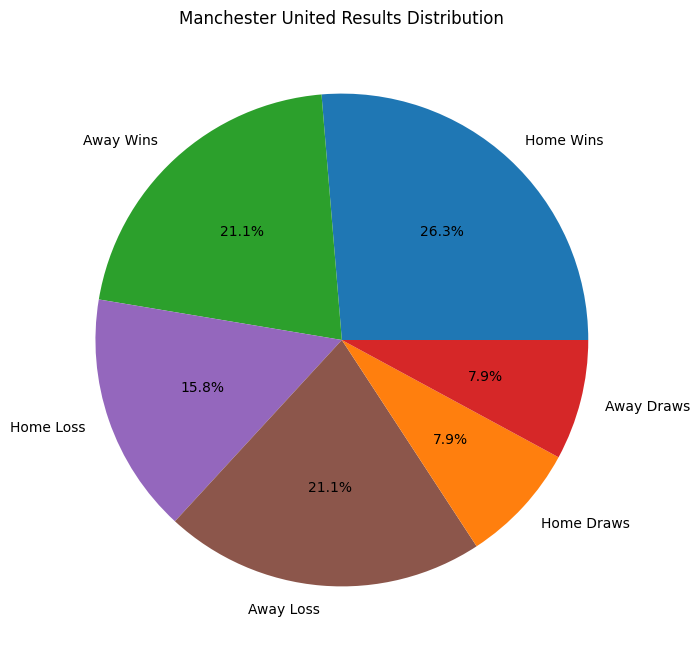

In [55]:
 # Calculate total matches in each category
total_home_wins = len(man_utd_home_wins)
total_home_loss = len(man_utd_home_loss)
total_away_wins = len(man_utd_away_wins)
total_away_loss = len(man_utd_away_loss)
total_home_draws = len(man_utd_home_draws)
total_away_draws = len(man_utd_away_draws)

# Create data for pie chart
labels = ['Home Wins', 'Away Wins','Home Loss','Away Loss','Home Draws', 'Away Draws']
values = [total_home_wins, total_away_wins, total_home_loss, total_away_loss, total_home_draws, total_away_draws]
colors = ['#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#ff7f0e', '#d62728']

plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Manchester United Results Distribution')
plt.show()

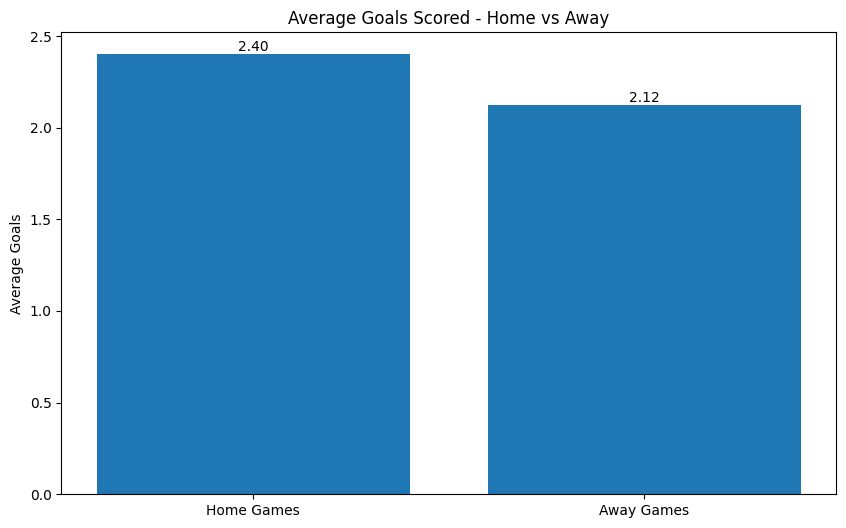

In [47]:
# Calculate average goals
home_avg_goals = man_utd_home_wins['home_score_full_time'].mean()
away_avg_goals = man_utd_away_wins['away_score_full_time'].mean()

plt.figure(figsize=(10, 6))
bars = plt.bar(['Home Games', 'Away Games'], [home_avg_goals, away_avg_goals])
plt.title('Average Goals Scored - Home vs Away')
plt.ylabel('Average Goals')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom')
plt.show()

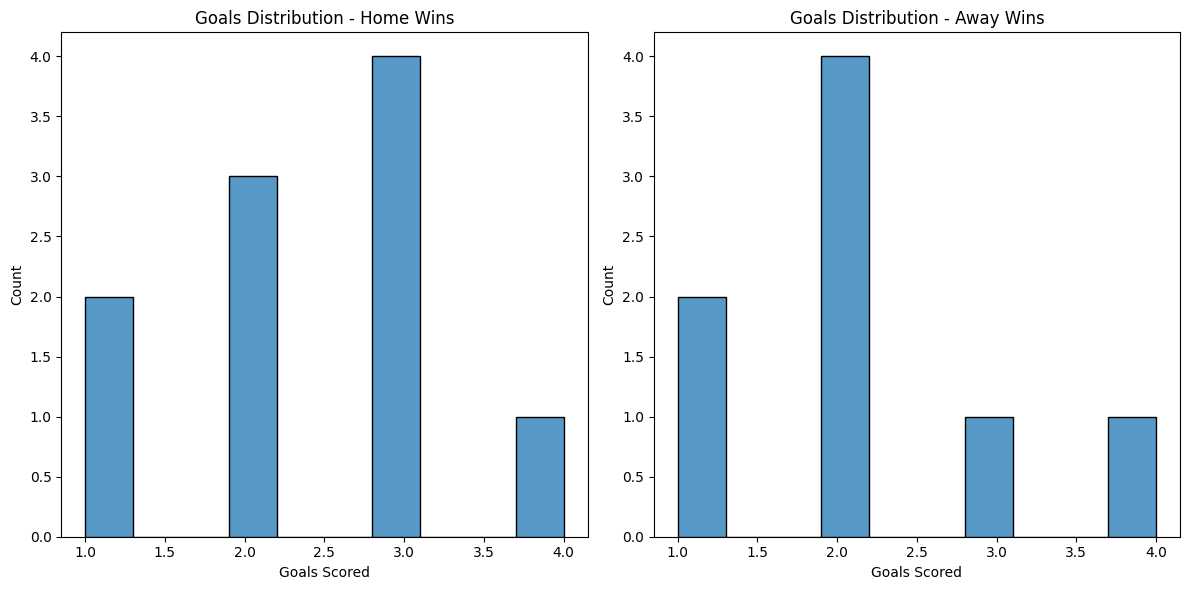

In [48]:
plt.figure(figsize=(12, 6))
    
# Create subplot for home and away goals
plt.subplot(1, 2, 1)
sns.histplot(data=man_utd_home_wins, x='home_score_full_time', bins=10)
plt.title('Goals Distribution - Home Wins')
plt.xlabel('Goals Scored')

plt.subplot(1, 2, 2)
sns.histplot(data=man_utd_away_wins, x='away_score_full_time', bins=10)
plt.title('Goals Distribution - Away Wins')
plt.xlabel('Goals Scored')

plt.tight_layout()
plt.show()

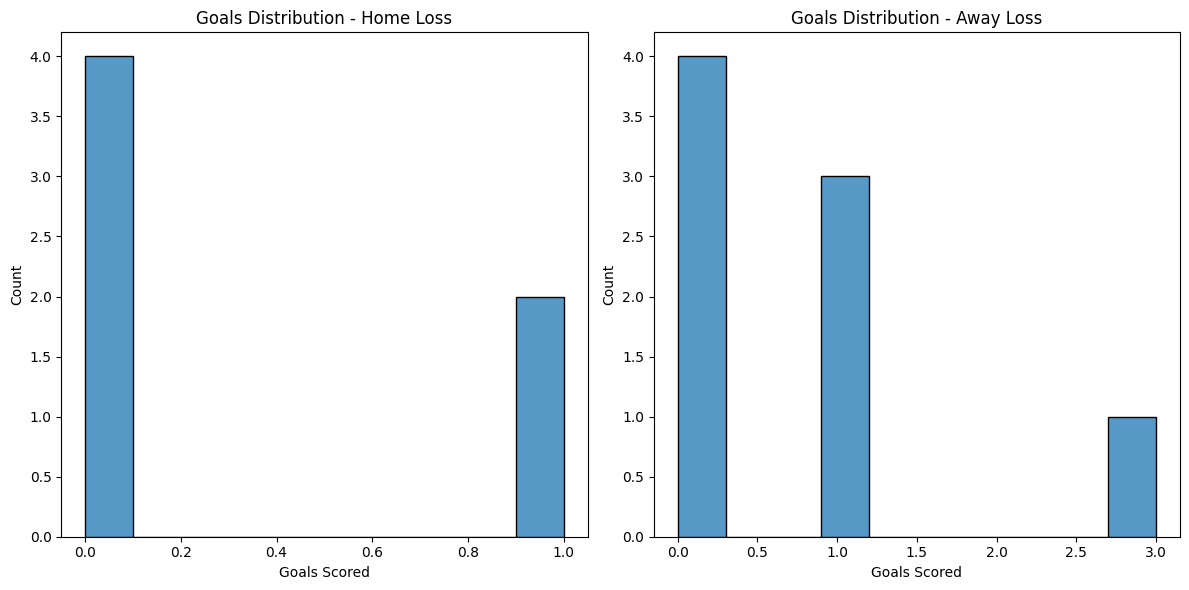

In [56]:
plt.figure(figsize=(12, 6))
    
# Create subplot for home and away goals
plt.subplot(1, 2, 1)
sns.histplot(data=man_utd_home_loss, x='home_score_full_time', bins=10)
plt.title('Goals Distribution - Home Loss')
plt.xlabel('Goals Scored')

plt.subplot(1, 2, 2)
sns.histplot(data=man_utd_away_loss, x='away_score_full_time', bins=10)
plt.title('Goals Distribution - Away Loss')
plt.xlabel('Goals Scored')

plt.tight_layout()
plt.show()

In [58]:
 # Combine all results with a 'Result' column
home_wins = man_utd_home_wins.assign(Result='Home Win',Goals_scored = man_utd_home_wins['home_score_full_time'])
away_wins = man_utd_away_wins.assign(Result='Away Win',Goals_scored = man_utd_away_wins['away_score_full_time'])
home_loss = man_utd_home_loss.assign(Result='Home Loss',Goals_scored = man_utd_home_loss['home_score_full_time'])
away_loss = man_utd_away_loss.assign(Result='Away Loss',Goals_scored = man_utd_away_loss['away_score_full_time'])
home_draws = man_utd_home_draws.assign(Result='Home Draw',Goals_scored = man_utd_home_draws['home_score_full_time'])
away_draws = man_utd_away_draws.assign(Result='Away Draw',Goals_scored = man_utd_away_draws['away_score_full_time'])

all_results = pd.concat([home_wins, away_wins, home_loss, away_loss, home_draws, away_draws])
all_results = all_results.sort_values('date')

fig = px.scatter(all_results, x='date', y='Goals_scored',
                color='Result',
                title='Manchester United Results Timeline',
                labels={'home_score_full_time': 'Goals Scored'})
fig.show()

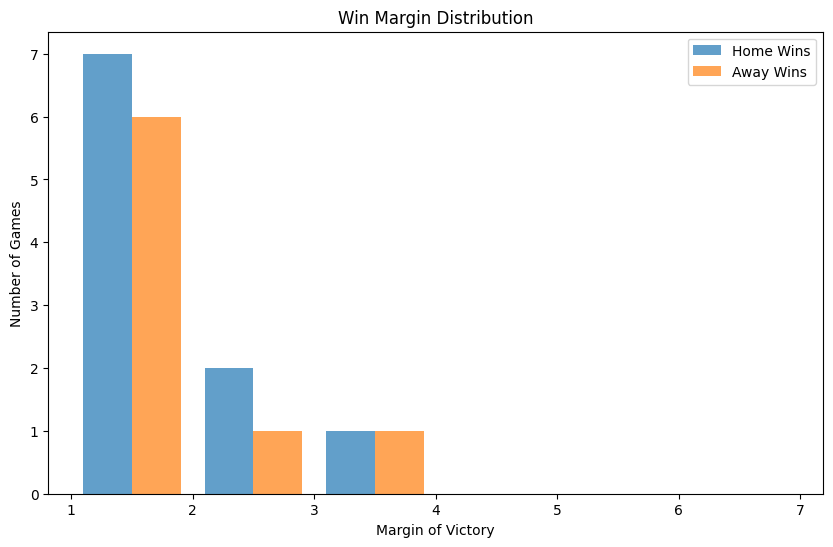

In [50]:
# Calculate winning margins
home_margins = man_utd_home_wins['home_score_full_time'] - man_utd_home_wins['away_score_full_time']
away_margins = man_utd_away_wins['away_score_full_time'] - man_utd_away_wins['home_score_full_time']

plt.figure(figsize=(10, 6))
plt.hist([home_margins, away_margins], label=['Home Wins', 'Away Wins'], 
            bins=range(1, 8), alpha=0.7)
plt.title('Win Margin Distribution')
plt.xlabel('Margin of Victory')
plt.ylabel('Number of Games')
plt.legend()
plt.show()

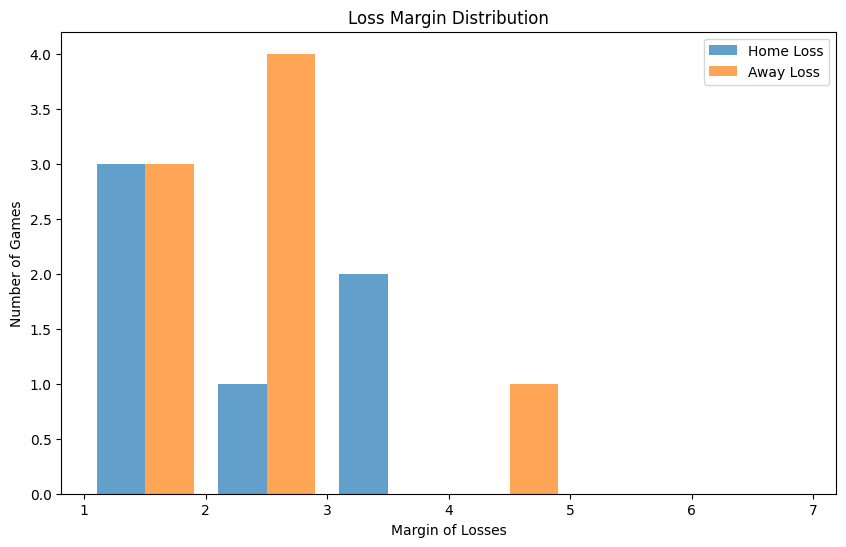

In [59]:
# Calculate Losing margins
home_margins = man_utd_home_loss['away_score_full_time'] - man_utd_home_loss['home_score_full_time']
away_margins = man_utd_away_loss['home_score_full_time'] - man_utd_away_loss['away_score_full_time']

plt.figure(figsize=(10, 6))
plt.hist([home_margins, away_margins], label=['Home Loss', 'Away Loss'], 
            bins=range(1, 8), alpha=0.7)
plt.title('Loss Margin Distribution')
plt.xlabel('Margin of Losses')
plt.ylabel('Number of Games')
plt.legend()
plt.show()

In [ ]:
import plotly.express as px

# Filter the data for matches involving Manchester United
manutd_data = df[(df['home_team'] == 'Man Utd') | (df['away_team'] == 'Man Utd')]

# Count matches officiated by each referee for Man Utd matches
ref_analysis = df.groupby('ref').size().reset_index(name='matchday')

# Create an interactive bar chart showing number of matches officiated by each referee
fig = px.bar(ref_analysis, x='ref', y='matchday', 
             title="Referee Analysis for Man Utd Matches",
             labels={'ref': 'Referee', 'matchday': 'Number of Matches'},
             color='matchday', color_continuous_scale='Blues')

fig.update_layout(xaxis=dict(title='Referee', tickangle=45),
                  yaxis_title='Number of Matches',
                  template='plotly_white')

fig.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'template' property of layout
        Received value: 'plotly_black'

    The 'template' property is an instance of Template
    that may be specified as:
      - An instance of :class:`plotly.graph_objs.layout.Template`
      - A dict of string/value properties that will be passed
        to the Template constructor

        Supported dict properties:
            
            data
                :class:`plotly.graph_objects.layout.template.Da
                ta` instance or dict with compatible properties
            layout
                :class:`plotly.graph_objects.Layout` instance
                or dict with compatible properties

      - The name of a registered template where current registered templates
        are stored in the plotly.io.templates configuration object. The names
        of all registered templates can be retrieved with:
            >>> import plotly.io as pio
            >>> list(pio.templates)  # doctest: +ELLIPSIS
            ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', ...]

      - A string containing multiple registered template names, joined on '+'
        characters (e.g. 'template1+template2'). In this case the resulting
        template is computed by merging together the collection of registered
        templates